# Importing Libraries

In [1]:
# pyforest is imported. It automatically imports commonly used data science libraries like numpy, pandas, matplotlib, and seaborn.
# This allows us to use these libraries without explicitly importing them.
import pyforest

# The sqlite3 library is imported to work with SQLite databases.
import sqlite3

# A comment describing the purpose of importing the sqlite3 library.
# SQLite is a lightweight, serverless, and easy-to-use SQL database that is suitable for various projects.

# The 'pyforest' and 'sqlite3' libraries are now available for use in the code.

## Establish a connection to the SQLite database

In [2]:
# Specify the SQLite database file name
db = 'movies.sqlite'

# Establish a connection to the SQLite database using the specified file name
con = sqlite3.connect(db)

# Create a cursor object to interact with the database
cur = con.cursor()

# The 'con' variable now holds the connection to the 'movies.sqlite' database,
# and the 'cur' variable is the cursor to execute SQL queries on the database.

# Movies   

### Get all the data from the movies

In [3]:
# Get all the data from the movies table using SQL query
query = "SELECT * FROM movies"

# Execute the SQL query using the cursor 'cur'
cur.execute(query)

# Fetch all the rows returned by the SQL query and store them in the 'movies' variable
movies = cur.fetchall()

In [4]:
# The 'movies' variable now contains all the data from the 'movies' table in the database
movies

[(43597,
  'Avatar',
  237000000,
  150,
  '2009-12-10',
  2787965087,
  'Avatar',
  7.2,
  11800,
  'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
  'Enter the World of Pandora.',
  19995,
  4762),
 (43598,
  "Pirates of the Caribbean: At World's End",
  300000000,
  139,
  '2007-05-19',
  961000000,
  "Pirates of the Caribbean: At World's End",
  6.9,
  4500,
  'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.',
  'At the end of the world, the adventure begins.',
  285,
  4763),
 (43599,
  'Spectre',
  245000000,
  107,
  '2015-10-26',
  880674609,
  'Spectre',
  6.3,
  4466,
  'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service 

### Creating a Movies DataFrame

In [5]:
movies = pd.DataFrame(movies, columns = ['id', 'original_title', 'budget', 'popularity', 'release_date',
'revenue', 'title', 'vote_average', 'vote_count', 'overview', 'tagline',
'uid', 'director_id' ])

# Viewing the movies dataset
movies.head()

<IPython.core.display.Javascript object>

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


###### Sure, here's a concise summary of the Movies DataFrame:

- The DataFrame "movies" contains information about various movies, including attributes such as budget, popularity, release date, revenue, and more.
- Columns: 'id', 'original_title', 'budget', 'popularity', 'release_date', 'revenue', 'title', 'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id'.
- The DataFrame shows the first five movie entries as examples.
- Example Row 1: Avatar, Budget: $237,000,000, Popularity: 150, Release Date: 2009-12-10, Revenue: $2,787,965,087, Tagline: "Enter the World of Pandora."

(Note: The actual dataset may contain more movie entries, and each row includes various details about the respective movies.)

### Total movies in dataset:

In [6]:
query = '''SELECT COUNT(*) AS row_count 
FROM movies'''

cur.execute(query)
count = cur.fetchall()

print(f"\n The number of movies in the IMDB database is : {count[0][0]}")


 The number of movies in the IMDB database is : 4773


### Movie Titles and Taglines: Handling Null Taglines with Default Values

In [7]:
query = '''SELECT original_title, COALESCE(tagline, 'No tagline available') AS tagline
FROM movies;'''

cur.execute(query)
movie_tagline_data  = cur.fetchall()

# Create DataFrame for movie tagline data
movie_tagline_df = pd.DataFrame(movie_tagline_data, columns=['original_title', 'tagline'])
movie_tagline_df

<IPython.core.display.Javascript object>

,original_title,tagline
0,Avatar,Enter the World of Pandora.
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins."
2,Spectre,A Plan No One Escapes
3,The Dark Knight Rises,The Legend Ends
4,John Carter,"Lost in our world, found in another."
...,...,...
4768,El Mariachi,"He didn't come looking for trouble, but troubl..."
4769,Newlyweds,A newlywed couple's honeymoon is upended by th...
4770,"Signed, Sealed, Delivered",No tagline available
4771,Shanghai Calling,A New Yorker in Shanghai


###### Movie Titles and Taglines: 
   The code fetches movie titles along with their taglines from the "movies" table in the database.                                For movies without a tagline, the code assigns the tagline as "No tagline available." The result is stored in the DataFrame `movie_tagline_df`. Here are a few examples of movies and their taglines:
   - Avatar: "Enter the World of Pandora."
   - Pirates of the Caribbean: At World's End: "At the end of the world, the adventure begins."
   - Spectre: "A Plan No One Escapes"
   - The Dark Knight Rises: "The Legend Ends"

### Analyzing Movie Revenues with Revenue Categories

In [8]:
# SQL query to select movie titles, revenue, and assign revenue categories based on revenue thresholds
query = '''
SELECT original_title, revenue,
       CASE
           WHEN revenue > 1000000000 THEN 'Blockbuster'
           WHEN revenue > 500000000 THEN 'High-grossing'
           WHEN revenue > 100000000 THEN 'Moderate-grossing'
           ELSE 'Low-grossing'
       END AS revenue_category
FROM movies
ORDER BY revenue_category
LIMIT 500;
'''

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching the data returned by the query and storing it in 'movie_revenue_category_data'
movie_revenue_category_data = cur.fetchall()

# Create DataFrame for movie revenue data with revenue categories
# Converting the fetched data into a Pandas DataFrame with specific column names
movie_revenue_category_df = pd.DataFrame(movie_revenue_category_data, 
                                         columns=['original_title', 'revenue', 'revenue_category'])

<IPython.core.display.Javascript object>

In [9]:
# Displaying the DataFrame containing movie titles, revenue, and revenue categories
movie_revenue_category_df

,original_title,revenue,revenue_category
0,Avatar,2787965087,Blockbuster
1,The Dark Knight Rises,1084939099,Blockbuster
2,Avengers: Age of Ultron,1405403694,Blockbuster
3,Pirates of the Caribbean: Dead Man's Chest,1065659812,Blockbuster
4,The Avengers,1519557910,Blockbuster
...,...,...,...
495,The River Wild,0,Low-grossing
496,The Indian in the Cupboard,0,Low-grossing
497,Savages,82966152,Low-grossing
498,Cellular,56422687,Low-grossing


###### Analyzing Movie Revenues with Revenue Categories:
   The code analyzes movie revenues and assigns revenue categories based on revenue thresholds. The result is stored in the DataFrame `movie_revenue_category_df`. Here are some examples of movies and their revenue categories:
   - Avatar: Blockbuster (revenue > 1 billion)
   - The Dark Knight Rises: Blockbuster (revenue > 1 billion)
   - Avengers: Age of Ultron: Blockbuster (revenue > 1 billion)
   - Pirates of the Caribbean: Dead Man's Chest: Blockbuster (revenue > 1 billion)
   - The Avengers: Blockbuster (revenue > 1 billion)
   - The River Wild: Low-grossing (revenue = 0)
   - Cellular: Low-grossing (revenue < 100 million)


### Analyzing Movie Popularity with Popularity Tag

In [10]:
# SQL query to select movie titles, popularity, and assign popularity tags based on popularity thresholds
query = '''
SELECT original_title, popularity,
       CASE
           WHEN popularity >= 80 THEN 'Super Popular'
           WHEN popularity >= 50 THEN 'Very Popular'
           WHEN popularity >= 30 THEN 'Popular'
           ELSE 'Average'
       END AS popularity_tag
FROM movies;
'''

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching the data returned by the query and storing it in 'movie_popularity_data'
movie_popularity_data = cur.fetchall()

# Create DataFrame for movie popularity data with popularity tags
# Converting the fetched data into a Pandas DataFrame with specific column names
movie_popularity_df = pd.DataFrame(movie_popularity_data, 
                                   columns=['original_title', 'popularity', 'popularity_tag'])

<IPython.core.display.Javascript object>

In [11]:
# Displaying the DataFrame containing movie titles, popularity, and popularity tags
movie_popularity_df

,original_title,popularity,popularity_tag
0,Avatar,150,Super Popular
1,Pirates of the Caribbean: At World's End,139,Super Popular
2,Spectre,107,Super Popular
3,The Dark Knight Rises,112,Super Popular
4,John Carter,43,Popular
...,...,...,...
4768,El Mariachi,14,Average
4769,Newlyweds,0,Average
4770,"Signed, Sealed, Delivered",1,Average
4771,Shanghai Calling,0,Average


###### Analyzing Movie Popularity with Popularity Tag:
   The code analyzes movie popularity and assigns popularity tags based on popularity thresholds. The result is stored in the DataFrame `movie_popularity_df`. Here are some examples of movies and their popularity tags:
   - Avatar: Super Popular (popularity >= 80)
   - Pirates of the Caribbean: At World's End: Super Popular (popularity >= 80)
   - Spectre: Super Popular (popularity >= 80)
   - The Dark Knight Rises: Super Popular (popularity >= 80)
   - John Carter: Popular (popularity >= 50)
   - El Mariachi: Average (popularity < 30)

### Top Movies: Budget over $50,000,000 and Vote_Average above 7.5

In [12]:
# SQL query to retrieve movies with a budget greater than 50,000,000 and a vote average higher than 7.5
query = '''SELECT * 
           FROM movies 
           WHERE budget > 50000000 AND vote_average > 7.5'''

# Execute the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching the data returned by the query and storing it in 'high_budget_high_rated_movies'
high_budget_high_rated_movies = cur.fetchall()

# Create a DataFrame to hold the high-budget and highly-rated movie data
# Converting the fetched data into a Pandas DataFrame with appropriate column names
high_budget_high_rated_movies_df = pd.DataFrame(high_budget_high_rated_movies,
                                               columns=['id', 'original_title', 'budget', 'popularity', 
                                                        'release_date', 'revenue','title', 'vote_average', 
                                                        'vote_count', 'overview', 'tagline', 'uid','director_id'])

<IPython.core.display.Javascript object>

In [13]:
high_budget_high_rated_movies_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
1,43619,The Hobbit: The Desolation of Smaug,250000000,94,2013-12-11,958400000,The Hobbit: The Desolation of Smaug,7.6,4524,"The Dwarves, Bilbo and Gandalf have successful...",Beyond darkness... beyond desolation... lies t...,57158,4777
2,43639,Toy Story 3,200000000,59,2010-06-16,1066969703,Toy Story 3,7.6,4597,"Woody, Buzz, and the rest of Andy's toys haven...",No toy gets left behind.,10193,4792
3,43654,WALL·E,180000000,66,2008-06-22,521311860,WALL·E,7.8,6296,WALL·E is the last robot left on an Earth that...,An adventure beyond the ordinar-E.,10681,4766
4,43662,The Dark Knight,185000000,187,2008-07-16,1004558444,The Dark Knight,8.2,12002,Batman raises the stakes in his war on crime. ...,Why So Serious?,155,4765
5,43663,Up,175000000,92,2009-05-13,735099082,Up,7.7,6870,Carl Fredricksen spent his entire life dreamin...,None,14160,4806
6,43671,Edge of Tomorrow,178000000,79,2014-05-27,370541256,Edge of Tomorrow,7.6,4858,Major Bill Cage is an officer who has never se...,"Live, Die, Repeat",137113,4813
7,43674,Inside Out,175000000,128,2015-06-09,857611174,Inside Out,8.0,6560,"Growing up can be a bumpy road, and it's no ex...",Meet the little voices inside your head.,150540,4806
8,43682,Captain America: The Winter Soldier,170000000,72,2014-03-20,714766572,Captain America: The Winter Soldier,7.6,5764,After the cataclysmic events in New York with ...,In heroes we trust.,100402,4781
9,43685,Big Hero 6,165000000,203,2014-10-24,652105443,Big Hero 6,7.8,6135,The special bond that develops between plus-si...,From the creators of Wreck-it Ralph and Frozen,177572,4823


###### Top Movies: Budget over $50,000,000 and Vote_Average above 7.5.                

- A query selects movies with budgets over $50,000,000 and vote averages above 7.5.
   - Results are stored in the DataFrame `high_budget_high_rated_movies_df`.
   - The DataFrame contains 47 movies that meet the criteria.

### Keyword-based Movie Search: Exploring Titles and Overviews

In [14]:
# SQL query to retrieve all movies with a title or overview containing 'Science Fiction'
# The results are sorted first by vote average in descending order and then by vote count in descending order
query = """SELECT *
           FROM movies
           WHERE title LIKE '%Science Fiction%' OR overview LIKE '%Science Fiction%'
           ORDER BY vote_average DESC, vote_count DESC"""

# Execute the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching the data returned by the query and storing it in 'science_fiction_search_results'
science_fiction_search_results = cur.fetchall()

# Create a DataFrame to hold the science fiction search results
# Converting the fetched data into a Pandas DataFrame with appropriate column names
science_fiction_search_results_df = pd.DataFrame(science_fiction_search_results, 
                                                 columns=['id', 'original_title', 'budget', 'popularity', 
                                                          'release_date', 'revenue','title', 'vote_average', 
                                                          'vote_count', 'overview', 'tagline', 'uid','director_id'])

<IPython.core.display.Javascript object>

In [15]:
science_fiction_search_results_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,45594,Her,23000000,53,2013-12-18,47351251,Her,7.9,4097,"In the not so distant future, Theodore, a lone...",A Spike Jonze Love Story,152601,4932
1,44949,Gattaca,36000000,70,1997-09-07,12532777,Gattaca,7.5,1808,Science fiction drama about a future society i...,There is no gene for the human spirit.,782,5226
2,43962,Contact,90000000,55,1997-07-11,171120329,Contact,7.2,1308,Contact is a science fiction film about an enc...,"If it's just us, it seems like an awful waste ...",686,4804
3,45365,Martian Child,0,5,2007-11-02,0,Martian Child,6.8,79,"A recently-widowed, science fiction writer con...","doesn't matter where you come from, as long as...",5126,5537
4,48266,"The Beast from 20,000 Fathoms",210000,2,1953-06-13,5000000,"The Beast from 20,000 Fathoms",6.7,41,"The Beast from 20,000 Fathoms is a 1953 scienc...",It's alive !,35073,7018
5,45383,Flatliners,26000000,24,1990-08-09,61489265,Flatliners,6.3,404,Five medical students want to find out if ther...,Some lines shouldn't be crossed.,1551,4892
6,44070,Mars Attacks!,70000000,44,1996-12-12,101371017,Mars Attacks!,6.1,1509,'We come in peace' is not what those green men...,Nice planet. We'll take it!,75,4785


###### Keyword-based Movie Search: Exploring Titles and Overviews (Science Fiction)
   - A query searches for movies with 'Science Fiction' in their title or overview.
   - Results are ordered by vote_average (descending) and vote_count (descending).
   - The output is stored in the DataFrame `science_fiction_search_results_df`.
   - It lists 7 science fiction movies that match the search criteria.

### Audience's Choice: Best Movies from '2001-01-01' to '2012-12-12

In [16]:
# SQL query to retrieve all movies with a release date between '2001-01-01' and '2012-12-12',
# sorted by vote count in descending order
query = """SELECT * FROM movies 
           WHERE release_date BETWEEN '2001-01-01' AND '2012-12-12'
           ORDER BY vote_count DESC"""

# Execute the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching the data returned by the query and storing it in 'date_range_search_results'
date_range_search_results = cur.fetchall()

# Create a DataFrame to hold the movies within the specified date range
# Converting the fetched data into a Pandas DataFrame with appropriate column names
date_range_search_results_df = pd.DataFrame(date_range_search_results, 
                                            columns=['id', 'original_title', 'budget', 'popularity', 
                                                     'release_date', 'revenue','title', 'vote_average', 
                                                     'vote_count', 'overview', 'tagline', 'uid','director_id'])

<IPython.core.display.Javascript object>

In [17]:
date_range_search_results_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43693,Inception,160000000,167,2010-07-14,825532764,Inception,8.1,13752,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,27205,4765
1,43662,The Dark Knight,185000000,187,2008-07-16,1004558444,The Dark Knight,8.2,12002,Batman raises the stakes in his war on crime. ...,Why So Serious?,155,4765
2,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
3,43613,The Avengers,220000000,144,2012-04-25,1519557910,The Avengers,7.4,11776,When an unexpected enemy emerges and threatens...,Some assembly required.,24428,4769
4,44023,The Hunger Games,75000000,68,2012-03-12,691210692,The Hunger Games,6.9,9455,Every year in the ruins of what was once North...,May The Odds Be Ever In Your Favor.,70160,4973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,48223,Anderson's Cross,300000,0,2010-05-20,0,Anderson's Cross,0.0,0,"Nick Anderson, Kevin Daniels, and Tracey Green...",Sometimes the boy next door is more than the b...,324352,6992
2509,48250,Rust,0,0,2010-10-07,0,Rust,0.0,0,"In the midst of a midlife crisis of faith, a m...",None,46252,7007
2510,48318,The Work and The Story,0,0,2003-01-01,0,The Work and The Story,0.0,0,"It is July, 2000 Richard Dutcher, the man who ...",Dream big. Make it happen?,266857,7052
2511,48366,The Legend of God's Gun,0,0,2007-07-08,0,The Legend of God's Gun,0.0,0,A gun-slinging preacher returns to the debauch...,None,69382,7090


###### Audience's Choice: Best Movies from '2001-01-01' to '2012-12-12
   - An SQL query selects movies released between '2001-01-01' and '2012-12-12'.
   - Results are ordered by vote_count in descending order.
   - The output is stored in the DataFrame `date_range_search_results_df`.
   - The DataFrame contains 2513 movies released within the specified date range.

### Box Office King: Revealing the Highest-Grossing Movie of All Time

In [18]:
# SQL query to retrieve the movie with the highest revenue from the 'movies' table
query = '''SELECT * FROM movies ORDER BY revenue DESC LIMIT 1'''

# Execute the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching the data returned by the query and storing it in 'highest_revenue_movie'
highest_revenue_movie = cur.fetchall()

# Create a DataFrame to hold the movie data with the highest revenue
# Converting the fetched data into a Pandas DataFrame with appropriate column names
highest_revenue_movie_df = pd.DataFrame(highest_revenue_movie,
                                        columns=['id', 'original_title', 'budget', 
                                                 'popularity', 'release_date', 'revenue',
                                                 'title', 'vote_average', 'vote_count',
                                                 'overview', 'tagline', 'uid','director_id'])

<IPython.core.display.Javascript object>

In [19]:
highest_revenue_movie_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762


###### Highest-Grossing Movie of All Time:**
   - The movie "Avatar" holds the title of the highest-grossing movie of all time, with a total revenue of $2,787,965,087 worldwide.
   - "Avatar" was released on December 10, 2009, and directed by James Cameron.

### Summing Up Success: Calculating the Total Revenue of All Movies

In [20]:
# SQL query to calculate the total revenue from the 'revenue' column in the 'movies' table
query = '''SELECT SUM(revenue) AS total_revenue FROM movies'''

# Execute the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching the data returned by the query and storing it in 'total_revenue_data'
total_revenue_data = cur.fetchall()

# Create a DataFrame to hold the total revenue data
# Converting the fetched data into a Pandas DataFrame with the column name 'revenue'
total_revenue_data_df = pd.DataFrame(total_revenue_data, columns=['total_revenue'])

<IPython.core.display.Javascript object>

In [21]:
total_revenue_data_df

,total_revenue
0,395095074714


###### Total Revenue of All Movies:
   - The combined total revenue of all movies in the database is $395,095,074,714.
   - This represents the immense financial success of the films included in the database.

### Top 10 Crowd Favorites: Movies with the Highest Vote Count

In [22]:
# Define the SQL query to retrieve data for the top 10 movies with the highest vote counts
query = '''SELECT * FROM movies ORDER BY vote_count DESC LIMIT 10;'''

# Execute the SQL query using the database cursor
cur.execute(query)

# Fetch all the data returned by the query and store it in the 'top_10_movies_data' variable
top_10_movies_data = cur.fetchall()

# Create a DataFrame named 'top_10_movies_df' with the fetched data and specify column names
top_10_movies_df = pd.DataFrame(top_10_movies_data, columns=['id', 'original_title', 'budget', 
                                                             'popularity', 'release_date', 'revenue',
                                                             'title', 'vote_average', 'vote_count',
                                                             'overview', 'tagline', 'uid', 'director_id'])

<IPython.core.display.Javascript object>

In [23]:
top_10_movies_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43693,Inception,160000000,167,2010-07-14,825532764,Inception,8.1,13752,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,27205,4765
1,43662,The Dark Knight,185000000,187,2008-07-16,1004558444,The Dark Knight,8.2,12002,Batman raises the stakes in his war on crime. ...,Why So Serious?,155,4765
2,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
3,43613,The Avengers,220000000,144,2012-04-25,1519557910,The Avengers,7.4,11776,When an unexpected enemy emerges and threatens...,Some assembly required.,24428,4769
4,44385,Deadpool,58000000,514,2016-02-09,783112979,Deadpool,7.4,10995,Deadpool tells the origin story of former Spec...,Witness the beginning of a happy ending,293660,5151
5,43692,Interstellar,165000000,724,2014-11-05,675120017,Interstellar,8.1,10867,Interstellar chronicles the adventures of a gr...,Mankind was born on Earth. It was never meant ...,157336,4765
6,43884,Django Unchained,100000000,82,2012-12-25,425368238,Django Unchained,7.8,10099,"With the help of a German bounty hunter, a fre...","Life, liberty and the pursuit of vengeance.",68718,4927
7,43691,Guardians of the Galaxy,170000000,481,2014-07-30,773328629,Guardians of the Galaxy,7.9,9742,"Light years from Earth, 26 years after being a...",All heroes start somewhere.,118340,4827
8,44023,The Hunger Games,75000000,68,2012-03-12,691210692,The Hunger Games,6.9,9455,Every year in the ruins of what was once North...,May The Odds Be Ever In Your Favor.,70160,4973
9,43724,Mad Max: Fury Road,150000000,434,2015-05-13,378858340,Mad Max: Fury Road,7.2,9427,An apocalyptic story set in the furthest reach...,What a Lovely Day.,76341,4845


###### Top 10 Crowd Favorites:
   - The top 10 movies with the highest vote counts are a mix of popular and critically acclaimed films.
   - "Inception," "The Dark Knight," and "Avatar" are among the top three movies with the highest vote counts.
   - The popularity of these movies indicates that they have resonated well with audiences.

### Top 10 Biggest Movie Budgets: The Most Expensive Blockbusters

In [24]:
# Define the SQL query to retrieve data for the top 10 movies with the highest budgets
query = '''SELECT * FROM movies ORDER BY budget DESC LIMIT 10'''

# Execute the SQL query using the database cursor
cur.execute(query)

# Fetch all the data returned by the query and store it in the 'top_10_budget_movies' variable
top_10_budget_movies = cur.fetchall()

# Create a DataFrame named 'top_10_budget_movies_df' with the fetched data and specify column names
top_10_budget_movies_df = pd.DataFrame(top_10_budget_movies, 
                                       columns=['id', 'original_title', 'budget', 
                                                'popularity', 'release_date', 'revenue',
                                                'title', 'vote_average', 'vote_count',
                                                'overview', 'tagline', 'uid', 'director_id'])

<IPython.core.display.Javascript object>

In [25]:
top_10_budget_movies_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43614,Pirates of the Caribbean: On Stranger Tides,380000000,135,2011-05-14,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,Captain Jack Sparrow crosses paths with a woma...,Live Forever Or Die Trying.,1865,4775
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
3,43607,Superman Returns,270000000,57,2006-06-28,391081192,Superman Returns,5.4,1400,Superman returns to discover his 5-year absenc...,None,1452,4772
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
5,43603,Tangled,260000000,48,2010-11-24,591794936,Tangled,7.4,3330,When the kingdom's most wanted-and most charmi...,They're taking adventure to new lengths.,38757,4768
6,43602,Spider-Man 3,258000000,115,2007-05-01,890871626,Spider-Man 3,5.9,3576,The seemingly invincible Spider-Man goes up ag...,The battle within.,559,4767
7,43610,The Lone Ranger,255000000,49,2013-07-03,89289910,The Lone Ranger,5.9,2311,The Texas Rangers chase down a gang of outlaws...,Never Take Off the Mask,57201,4763
8,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
9,43605,Harry Potter and the Half-Blood Prince,250000000,98,2009-07-07,933959197,Harry Potter and the Half-Blood Prince,7.4,5293,"As Harry begins his sixth year at Hogwarts, he...",Dark Secrets Revealed,767,4770


###### Top 10 Biggest Movie Budgets:
   - The top 10 movies with the highest budgets are big-budget blockbusters.
   - "Pirates of the Caribbean: On Stranger Tides" tops the list with a budget of $380,000,000.
   - High-budget movies often invest heavily in production and visual effects to create a visually impressive experience.

### Top 10 Most Popular Movies: The Crowd's Favorites

In [26]:
# Define the SQL query to retrieve data for the movies ordered by popularity in descending order
query = '''SELECT * 
FROM movies 
ORDER BY popularity DESC'''

# Execute the SQL query using the database cursor
cur.execute(query)

# Fetch the top 10 rows of data returned by the query and store it in the 'top_10_popularity_movies' variable
top_10_popularity_movies = cur.fetchmany(size=10)

# Create a DataFrame named 'top_10_popularity_movies_df' with the fetched data and specify column names
top_10_popularity_movies_df = pd.DataFrame(top_10_popularity_movies, 
                                           columns=['id', 'original_title', 'budget', 
                                                    'popularity', 'release_date', 'revenue',
                                                    'title', 'vote_average', 'vote_count',
                                                    'overview', 'tagline', 'uid', 'director_id'])

<IPython.core.display.Javascript object>

In [27]:
top_10_popularity_movies_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,44143,Minions,74000000,875,2015-06-17,1156730962,Minions,6.4,4571,"Minions Stuart, Kevin and Bob are recruited by...","Before Gru, they had a history of bad bosses",211672,5045
1,43692,Interstellar,165000000,724,2014-11-05,675120017,Interstellar,8.1,10867,Interstellar chronicles the adventures of a gr...,Mankind was born on Earth. It was never meant ...,157336,4765
2,44385,Deadpool,58000000,514,2016-02-09,783112979,Deadpool,7.4,10995,Deadpool tells the origin story of former Spec...,Witness the beginning of a happy ending,293660,5151
3,43691,Guardians of the Galaxy,170000000,481,2014-07-30,773328629,Guardians of the Galaxy,7.9,9742,"Light years from Earth, 26 years after being a...",All heroes start somewhere.,118340,4827
4,43724,Mad Max: Fury Road,150000000,434,2015-05-13,378858340,Mad Max: Fury Road,7.2,9427,An apocalyptic story set in the furthest reach...,What a Lovely Day.,76341,4845
5,43625,Jurassic World,150000000,418,2015-06-09,1513528810,Jurassic World,6.5,8662,Twenty-two years after the events of Jurassic ...,The park is open.,135397,4783
6,43796,Pirates of the Caribbean: The Curse of the Bla...,140000000,271,2003-07-09,655011224,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,"Jack Sparrow, a freewheeling 17th-century pira...",Prepare to be blown out of the water.,22,4763
7,43679,Dawn of the Planet of the Apes,170000000,243,2014-06-26,710644566,Dawn of the Planet of the Apes,7.3,4410,A group of scientists in San Francisco struggl...,One last chance for peace.,119450,4818
8,43797,The Hunger Games: Mockingjay - Part 1,125000000,206,2014-11-18,752100229,The Hunger Games: Mockingjay - Part 1,6.6,5584,Katniss Everdeen reluctantly becomes the symbo...,Fire burns brighter in the darkness,131631,4831
9,43685,Big Hero 6,165000000,203,2014-10-24,652105443,Big Hero 6,7.8,6135,The special bond that develops between plus-si...,From the creators of Wreck-it Ralph and Frozen,177572,4823


###### Top 10 Most Popular Movies:
   - The top 10 most popular movies are the ones with the highest popularity scores.
   - "Minions" is the most popular movie, followed by "Interstellar" and "Deadpool."
   - Popularity scores indicate the level of interest and attention these movies received from the audience.

### Top 10 Movies by Release Date and Vote Average

In [28]:
# Define the SQL query to retrieve data for the top 10 movies ordered by release date in descending order and vote average in descending order
query = '''SELECT *
FROM movies
ORDER BY release_date DESC, vote_average DESC
LIMIT 10'''

# Execute the SQL query using the database cursor
cur.execute(query)

# Fetch the data returned by the query and store it in the 'sort_rel_dt_n_vt_avr' variable
sort_rel_dt_n_vt_avr = cur.fetchall()

# Create a DataFrame named 'top_10_sort_rel_dt_n_vt_avr_df' with the fetched data and specify column names
top_10_sort_rel_dt_n_vt_avr_df = pd.DataFrame(sort_rel_dt_n_vt_avr, 
                                              columns=['id', 'original_title', 'budget', 
                                                       'popularity', 'release_date', 'revenue',
                                                       'title', 'vote_average', 'vote_count',
                                                       'overview', 'tagline', 'uid', 'director_id'])

<IPython.core.display.Javascript object>

In [29]:
top_10_sort_rel_dt_n_vt_avr_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,47852,Growing Up Smith,0,0,2017-02-03,0,Growing Up Smith,7.4,7,"In 1979, an Indian family moves to America wit...",It’s better to stand out than to fit in.,426469,6751
1,47005,Two Lovers and a Bear,0,3,2016-10-02,0,Two Lovers and a Bear,6.8,27,Set in a small town near the North Pole where ...,None,325373,6273
2,46899,Mr. Church,8000000,7,2016-09-16,0,Mr. Church,7.0,129,A unique friendship develops when a little gir...,He was the one person she could always count on.,374461,5304
3,46846,Kicks,0,3,2016-09-09,0,Kicks,7.5,18,When his hard-earned kicks get snatched by a l...,They aren't just shoes,385736,6197
4,48317,The Birth of a Nation,8500000,9,2016-09-09,15861566,The Birth of a Nation,6.5,178,"Nat Turner, a former slave in America, leads a...",The Untold Story of Nat Turner,339408,7051
5,47633,Antibirth,35000000,3,2016-09-02,0,Antibirth,4.8,40,In a desolate community full of drug-addled Ma...,None,332285,6616
6,45870,Hands of Stone,20000000,7,2016-08-26,0,Hands of Stone,6.1,109,The legendary Roberto Duran and his equally le...,No más. No surrender.,184341,5729
7,43954,Ben-Hur,100000000,29,2016-08-17,94061311,Ben-Hur,5.3,621,A falsely accused nobleman survives years of s...,First to finish. Last to die.,271969,4962
8,46610,Pete's Dragon,65000000,31,2016-08-10,143695338,Pete's Dragon,6.2,679,Pete is a mysterious 10-year-old with no famil...,Some secrets are too big to keep.,294272,6067
9,43669,Suicide Squad,175000000,90,2016-08-02,745000000,Suicide Squad,5.9,7458,"From DC Comics comes the Suicide Squad, an ant...",Worst Heroes Ever,297761,4811


###### Top 10 Movies by Release Date and Vote Average:
   - The top 10 movies ordered by both release date and vote average.
   - These movies have stood the test of time and have maintained high vote averages.
   - "Growing Up Smith," "Two Lovers and a Bear," and "Mr. Church" are among the top-ranked .

# Directors

### Get all the data from the directors

In [30]:
# SQL query to select all data from the 'directors' table
query = 'SELECT * FROM directors'

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching all the data returned by the query and storing it in the 'directors' variable
directors = cur.fetchall()

# Displaying the directors data
# Looping through each director and printing their information
for director in directors:
    print(director)

('James Cameron', 4762, 2, 2710, 'Directing')
('Gore Verbinski', 4763, 2, 1704, 'Directing')
('Sam Mendes', 4764, 2, 39, 'Directing')
('Christopher Nolan', 4765, 2, 525, 'Directing')
('Andrew Stanton', 4766, 2, 7, 'Directing')
('Sam Raimi', 4767, 2, 7623, 'Directing')
('Byron Howard', 4768, 2, 76595, 'Directing')
('Joss Whedon', 4769, 2, 12891, 'Directing')
('David Yates', 4770, 2, 11343, 'Directing')
('Zack Snyder', 4771, 2, 15217, 'Directing')
('Bryan Singer', 4772, 2, 9032, 'Directing')
('Marc Forster', 4773, 2, 12995, 'Directing')
('Andrew Adamson', 4774, 2, 5524, 'Directing')
('Rob Marshall', 4775, 2, 17633, 'Directing')
('Barry Sonnenfeld', 4776, 2, 5174, 'Directing')
('Peter Jackson', 4777, 2, 108, 'Directing')
('Marc Webb', 4778, 2, 87742, 'Directing')
('Ridley Scott', 4779, 2, 578, 'Directing')
('Chris Weitz', 4780, 0, 3288, 'Directing')
('Anthony Russo', 4781, 2, 19271, 'Directing')
('Peter Berg', 4782, 2, 36602, 'Directing')
('Colin Trevorrow', 4783, 2, 930707, 'Directing')


### Creating a Directors DataFrame

In [31]:
# Creating a directors DataFrame
directors=pd.DataFrame(directors, columns=['name', 'id', 'gender', 'uid', 'department'])

# Displaying the directors DataFrame
directors

<IPython.core.display.Javascript object>

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing
...,...,...,...,...,...
2344,Shane Carruth,7106,2,76624,Directing
2345,Neill Dela Llana,7107,0,1174437,Directing
2346,Scott Smith,7108,0,1219158,Directing
2347,Daniel Hsia,7109,2,208138,Directing


The code creates a DataFrame named "directors" containing information about directors from the 'directors' table in the database.                                        
The DataFrame has columns such as 'name', 'id', 'gender', 'uid', and 'department', representing the director's name, ID, gender, UID, and department.

### Directors with Empty Portfolio: No Associated Movies

In [32]:
# SQL query to select directors who have no associated movies in the 'movies' table
query = '''
SELECT directors.name AS director_name
FROM directors
LEFT JOIN movies ON directors.id = movies.director_id
WHERE movies.id IS NULL;
'''

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching a limited number (10) of rows from the result and storing it in 'movieless_directors'
movieless_directors = cur.fetchmany(size=10)

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with the column name 'director_name'
movieless_directors_df = pd.DataFrame(movieless_directors, columns=['director_name'])

<IPython.core.display.Javascript object>

In [33]:
# displaying the DataFrame containing the directors who have no associated movies
movieless_directors_df

,director_name


there are no missing values in the 'name,' 'id,' 'gender,' 'uid,' or 'department' columns.

### Sort Directors by Name: Ascending Order

In [34]:
# SQL query to select all data from the 'directors' table and order it by 'name' in ascending order
query = """
SELECT *
FROM directors
ORDER BY name ASC
"""

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching all the data returned by the query and storing it in 'sorted_directors_asc'
sorted_directors_asc = cur.fetchall()

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
sorted_directors_asc_df = pd.DataFrame(sorted_directors_asc, columns=['name', 'id', 'gender', 'uid', 'department'])


<IPython.core.display.Javascript object>

In [35]:
# Displaying the directors DataFrame
sorted_directors_asc_df

,name,id,gender,uid,department
0,Aaron Hann,6671,0,1454563,Directing
1,Aaron Schneider,6252,2,58292,Directing
2,Abel Ferrara,5974,2,39104,Directing
3,Adam Brooks,6247,2,16328,Directing
4,Adam Carolla,6742,0,76245,Directing
...,...,...,...,...,...
2344,Àlex Pastor,5043,2,94220,Directing
2345,Álex de la Iglesia,6127,0,57865,Directing
2346,Émile Gaudreault,6338,2,6980,Directing
2347,Éric Tessier,6603,2,130358,Directing


###### Sort Directors by Name: Ascending Order
- The dataset contains information on 2,350 directors.                
- The directors' data has been sorted in ascending order based on their names.                    
- The directors are sorted alphabetically based on their names, starting from "Aaron Hann" and ending with "Étienne Faure."

### Filtering Directors: Female Directors in the Film Department

In [36]:
# SQL query to select all data from the 'directors' table where gender is '1' (female) and department is 'Directing'
query = """
SELECT *
FROM directors
WHERE gender = '1'
  AND department = 'Directing'
"""

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching all the data returned by the query and storing it in 'female_directors_film_dept'
female_directors_film_dept = cur.fetchall()

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
female_directors_film_dept_df = pd.DataFrame(female_directors_film_dept, 
                                             columns=['name', 'id', 'gender', 'uid', 'department'])


<IPython.core.display.Javascript object>

In [37]:
# Displaying the directors DataFrame containing female directors in the 'Directing' department
female_directors_film_dept_df

,name,id,gender,uid,department
0,Brenda Chapman,4801,1,59803,Directing
1,Lilly Wachowski,4805,1,9339,Directing
2,Jennifer Yuh Nelson,4853,1,142312,Directing
3,Kathryn Bigelow,4970,1,14392,Directing
4,Nancy Meyers,4978,1,17698,Directing
...,...,...,...,...,...
145,Marianna Palka,7027,1,77775,Directing
146,Ricki Stern,7028,1,74105,Directing
147,Lynn Shelton,7049,1,90492,Directing
148,Julie Davis,7066,1,87033,Directing


###### Female Directors in the Film Department
   - The query retrieved a total of 151 female directors who are categorized under the 'Directing' department.
   - Some notable female directors include Brenda Chapman, Lilly Wachowski, Jennifer Yuh Nelson, Kathryn Bigelow, and Nancy Meyers.



### Movie Directors and Their Films: An Overview

In [38]:
# SQL query to select movie titles and their respective directors' names by joining the 'movies' and 'directors' tables
query = '''
SELECT movies.title, directors.name AS director_name
FROM movies
JOIN directors ON movies.director_id = directors.id
'''

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching all the data returned by the query and storing it in 'movie_director_data'
movie_director_data = cur.fetchall()

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
movie_director_data_df = pd.DataFrame(movie_director_data, 
                                columns=['movies_title', 'director_name'])

<IPython.core.display.Javascript object>

In [39]:
# Displaying the DataFrame containing movie titles and their respective directors' names
movie_director_data_df

,movies_title,director_name
0,Avatar,James Cameron
1,Pirates of the Caribbean: At World's End,Gore Verbinski
2,Spectre,Sam Mendes
3,The Dark Knight Rises,Christopher Nolan
4,John Carter,Andrew Stanton
...,...,...
4768,El Mariachi,Robert Rodriguez
4769,Newlyweds,Edward Burns
4770,"Signed, Sealed, Delivered",Scott Smith
4771,Shanghai Calling,Daniel Hsia


###### Movie Directors and Their Films
   - The query retrieved a total of 4,773 movie titles along with their respective directors' names.
   - The DataFrame contains two columns: 'movies_title' for movie titles and 'director_name' for the name of the director who directed each movie.
   - Some notable movie titles and their directors include "Avatar" directed by James Cameron, "Pirates of the Caribbean: At World's End" directed by Gore Verbinski, and "The Dark Knight Rises" directed by Christopher Nolan.

### Finding Directors: Search by Name like(Steven)

In [40]:
# SQL query to select all data from the 'directors' table where the name contains 'Steven'
query = """
SELECT *
FROM directors
WHERE name LIKE '%Steven%'
"""

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching all the data returned by the query and storing it in 'directors_search_results'
directors_search_results = cur.fetchall()

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
directors_search_results_df = pd.DataFrame(directors_search_results, 
                                           columns=['name', 'id', 'gender', 'uid', 'department'])

<IPython.core.display.Javascript object>

In [41]:
# Displaying the DataFrame containing directors with names containing 'Steven'
directors_search_results_df

,name,id,gender,uid,department
0,Steven Spielberg,4799,2,488,Directing
1,Mark Steven Johnson,4895,2,16837,Directing
2,Steven Soderbergh,4909,2,1884,Directing
3,Steven Brill,5013,2,32593,Directing
4,Steven Zaillian,5117,2,2260,Directing
5,Robert Stevenhagen,5120,0,64152,Directing
6,Steven Quale,5216,2,93214,Directing
7,Steven Seagal,5221,2,23880,Directing
8,Steven E. de Souza,5390,2,1726,Directing
9,George Stevens,5698,2,18738,Directing


- The search query returned 14 directors whose names contain "Steven."             
- Notable directors among the search results include:               
  1. Steven Spielberg
  2. Steven Soderbergh
  3. Steven Brill
  4. Steven Zaillian
  5. Steven Seagal
- The search used the SQL "LIKE" operator with the '%Steven%' pattern, which means it matches any name that contains the substring "Steven" in any position.
- Some directors in the search results have middle initials or names containing "Steven," like "Mark Steven Johnson" and "Steven E. de Souza."

### Top 10 Box Office Visionaries: Directors and Their Movie Revenue

In [42]:
# SQL query to select directors' names and the total revenue of their movies, 
# joining the 'directors' and 'movies' tables, grouping by director_name, and ordering by total_revenue in descending order
query = '''
SELECT directors.name AS director_name, SUM(movies.revenue) AS total_revenue
FROM directors
JOIN movies ON directors.id = movies.director_id
GROUP BY director_name
ORDER BY total_revenue DESC
'''

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching a limited number (10) of rows from the result and storing it in 'top_directors_revenue'
top_directors_revenue = cur.fetchmany(size=10)

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
top_directors_revenue_df = pd.DataFrame(top_directors_revenue, 
                                        columns=['director_name', 'total_revenue'])

<IPython.core.display.Javascript object>

In [43]:
# Displaying the DataFrame containing directors' names and their total movie revenue in descending order
top_directors_revenue_df

,director_name,total_revenue
0,Steven Spielberg,9147393164
1,Peter Jackson,6498642820
2,James Cameron,5883569439
3,Michael Bay,5832524638
4,Christopher Nolan,4227483234
5,Chris Columbus,3725631503
6,Robert Zemeckis,3590622002
7,George Lucas,3339113893
8,Tim Burton,3337418241
9,Ridley Scott,3189557997


###### Top 10 Box Office Visionaries: Directors and Their Movie Revenue
   - The query finds the top 10 directors with the highest total movie revenue.
   - Steven Spielberg tops the list with a total movie revenue of $9,147,393,164.
   - Other notable directors in the top 10 include Peter Jackson, James Cameron, Michael Bay, and Christopher Nolan.
Top 10 Directors: Average Movie Revenue Reveal

### Top 10 Directors: Average Movie Revenue Revealed

In [44]:
# SQL query to select directors' names and the average revenue of their movies, 
# joining the 'directors' and 'movies' tables using LEFT JOIN, 
# grouping by director_name, and ordering by avg_movie_revenue in descending order
query = '''
SELECT directors.name AS director_name, AVG(movies.revenue) AS avg_movie_revenue
FROM directors
LEFT JOIN movies ON directors.id = movies.director_id
GROUP BY director_name
ORDER BY avg_movie_revenue DESC
'''

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching a limited number (10) of rows from the result and storing it in 'top_directors_avg_revenue'
top_directors_avg_revenue = cur.fetchmany(size=10)

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
top_directors_avg_revenue_df = pd.DataFrame(top_directors_avg_revenue, 
                                            columns=['director_name', 'avg_movie_revenue'])

<IPython.core.display.Javascript object>

In [45]:
# Displaying the DataFrame containing directors' names and their average movie revenue in descending order
top_directors_avg_revenue_df

,director_name,avg_movie_revenue
0,Chris Buck,1.274219e+09
1,Kyle Balda,1.156731e+09
2,Lee Unkrich,1.066970e+09
3,Joss Whedon,9.879437e+08
4,Chris Renaud,8.759583e+08
5,James Cameron,8.405099e+08
6,Roger Allers,7.882418e+08
7,Tim Miller,7.831130e+08
8,Colin Trevorrow,7.587683e+08
9,Robert Stromberg,7.585398e+08


###### Top 10 Directors: Average Movie Revenue Revealed
   - The query finds the top 10 directors with the highest average movie revenue per film.
   - Chris Buck leads the list with an average movie revenue of 1,274,219,000.
   - Notable directors like James Cameron, Joss Whedon, and Tim Miller are also part of the top 10.

### Top 10 Cinematic Legends: Directors with the Most Movies Directed

In [46]:
# SQL query to select directors' names and the number of movies they directed, 
# joining the 'directors' and 'movies' tables using LEFT JOIN, 
# grouping by director_name, and ordering by num_movies in descending order
query = '''
SELECT directors.name AS director_name, COUNT(movies.id) AS num_movies
FROM directors
LEFT JOIN movies ON directors.id = movies.director_id
GROUP BY director_name
ORDER BY num_movies DESC
'''

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching a limited number (10) of rows from the result and storing it in 'top_directors_num_movies'
top_directors_num_movies = cur.fetchmany(size=10)

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
top_directors_num_movies_df = pd.DataFrame(top_directors_num_movies, 
                                           columns=['director_name', 'num_movies'])

<IPython.core.display.Javascript object>

In [47]:
# Displaying the DataFrame containing directors' names and the number of movies they directed in descending order
top_directors_num_movies_df

,director_name,num_movies
0,Steven Spielberg,27
1,Woody Allen,21
2,Martin Scorsese,20
3,Clint Eastwood,20
4,Spike Lee,16
5,Robert Rodriguez,16
6,Ridley Scott,16
7,Steven Soderbergh,15
8,Renny Harlin,15
9,Tim Burton,14


###### Top 10 Cinematic Legends: Directors with the Most Movies Directed
   - The query finds the top 10 directors who have directed the most number of movies.
   - The results show the names of directors and the number of movies they have directed in descending order.
   - Steven Spielberg leads the list with 27 movies, followed by Woody Allen with 21 movies.

### Top 10 Directors and Movie Ratings: Unveiling the Average Vote Average

In [48]:
# SQL query to select directors' names and the average vote average of their movies, 
# joining the 'directors' and 'movies' tables using LEFT JOIN, 
# grouping by director_name, and ordering by avg_vote_average in descending order
query = '''
SELECT directors.name AS director_name, AVG(movies.vote_average) AS avg_vote_average
FROM directors
LEFT JOIN movies ON directors.id = movies.director_id
GROUP BY director_name
ORDER BY avg_vote_average DESC
'''

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching a limited number (10) of rows from the result and storing it in 'top_directors_avg_vote'
top_directors_avg_vote = cur.fetchmany(size=10)

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
top_directors_avg_vote_df = pd.DataFrame(top_directors_avg_vote, 
                                         columns=['director_name', 'avg_vote_average'])

<IPython.core.display.Javascript object>

In [49]:
# Displaying the DataFrame containing directors' names and the average vote average of their movies in descending order
top_directors_avg_vote_df

,director_name,avg_vote_average
0,Gary Sinyor,10.00
1,Rohit Jugraj,9.50
2,Lance Hool,9.30
3,Floyd Mutrux,8.50
4,Tim McCanlies,8.45
5,John Cromwell,8.40
6,Jem Cohen,8.30
7,Damien Chazelle,8.30
8,Philip Saville,8.20
9,Kevin Sullivan,8.20


###### Top 10 Directors and Movie Ratings: Unveiling the Average Vote Average
   - The query retrieved the top 10 directors based on the average vote average of their movies.
   - Gary Sinyor tops the list with an average vote average of 10.00.
   - Notable directors like Damien Chazelle and Kevin Sullivan are also part of the top 10.

### Merging Movies and Directors: Enhancing Movie Details with Director Information

In [50]:
# SQL query to select directors' names and the titles of movies directed by 'Christopher Nolan'
query = """
SELECT directors.name AS director_name, movies.title
FROM directors
JOIN movies ON directors.id = movies.director_id
WHERE directors.name = 'Christopher Nolan'
"""

# Executing the SQL query using the cursor 'cur'
cur.execute(query)

# Fetching all the data returned by the query and storing it in 'enhanced_movie_details'
nolan_movie_details = cur.fetchall()

# Displaying the directors data
# Converting the fetched data into a Pandas DataFrame with specific column names
nolan_movie_details_df = pd.DataFrame(nolan_movie_details, 
                                columns=['director_name', 'original_title'])

<IPython.core.display.Javascript object>

In [51]:
# Diaplaying the DataFrame containing the directors' names and the titles of movies directed by 'Christopher Nolan'
nolan_movie_details_df

,director_name,original_title
0,Christopher Nolan,The Dark Knight Rises
1,Christopher Nolan,The Dark Knight
2,Christopher Nolan,Interstellar
3,Christopher Nolan,Inception
4,Christopher Nolan,Batman Begins
5,Christopher Nolan,Insomnia
6,Christopher Nolan,The Prestige
7,Christopher Nolan,Memento


###### Merging Movies and Directors: Enhancing Movie Details with Director Information
   - The query retrieved all the movies directed by 'Christopher Nolan.'
   - Christopher Nolan directed several acclaimed movies, including "The Dark Knight Rises," "Inception," "Interstellar," and others.

# Christopher Nolan - The Cinematic Genius

In [52]:
# Importing the YouTubeVideo class from IPython.display to display a YouTube video
from IPython.display import YouTubeVideo

# Creating a YouTubeVideo object with the specified video ID and dimensions
video = YouTubeVideo("UfPIUvCg3ps", height = 500, width = 1000)

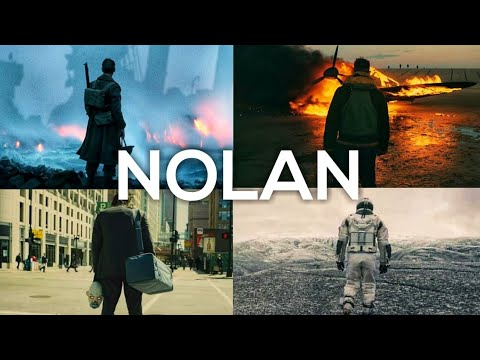

In [53]:
# Displaying the video using the display function
display(video)

###### This video may include clips, trailers, or discussions about Christopher Nolan's movies, showcasing his unique and impactful contributions to the world of cinema. Enjoy!
